In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, linear_model, datasets
from sklearn.linear_model import LinearRegression
import matplotlib.colors as colors


from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import itertools
import seaborn as sns


# Question One

In [2]:
# Healthy Control (HC), Parkinson’s disease (PD), Scans Without Evidence of Dopaminergic Deficit (SWEDD)
# COHORT_DEFINITION’ => diagnosis.
import_data = pd.read_csv("PPMI_DATSCAN.csv")

In [3]:
processed_data = import_data
import_data.head()

,Unnamed: 0,COHORT_DEFINITION,ENROLL_AGE,DATSCAN_CAUDATE_R,DATSCAN_CAUDATE_L,DATSCAN_PUTAMEN_R,DATSCAN_PUTAMEN_L,NP2PTOT
0,0,Healthy Control,69.1,2.99,3.43,2.94,2.63,0.0
1,1,Parkinson's Disease,65.1,1.56,1.12,0.62,0.48,3.0
2,2,Parkinson's Disease,67.6,2.13,2.28,0.80,0.83,15.0
3,3,Parkinson's Disease,56.7,2.19,1.27,0.66,0.57,5.0
4,4,Parkinson's Disease,57.5,2.28,2.12,0.76,0.15,4.0


In [40]:
le = preprocessing.LabelEncoder()
le.fit(processed_data.loc[:,"COHORT_DEFINITION"])

# Can use list(le.classses) to see how the label encoder has classified the different "Cohorts" in the data
list(le.classes_) 

# turning the different classes into intergers. i.e. Healthy Control = 0, Parkinson's Disease = 1, etc
name_encoding = le.transform(processed_data.loc[:,"COHORT_DEFINITION"])
# adding the new encoding to the end of the data frame. 
processed_data['Name Encoding'] = name_encoding
processed_data

,Unnamed: 0,COHORT_DEFINITION,ENROLL_AGE,DATSCAN_CAUDATE_R,DATSCAN_CAUDATE_L,DATSCAN_PUTAMEN_R,DATSCAN_PUTAMEN_L,NP2PTOT,Name Encoding
0,0,Healthy Control,69.1,2.99,3.43,2.94,2.63,0.0,0
1,1,Parkinson's Disease,65.1,1.56,1.12,0.62,0.48,3.0,1
2,2,Parkinson's Disease,67.6,2.13,2.28,0.80,0.83,15.0,1
3,3,Parkinson's Disease,56.7,2.19,1.27,0.66,0.57,5.0,1
4,4,Parkinson's Disease,57.5,2.28,2.12,0.76,0.15,4.0,1
...,...,...,...,...,...,...,...,...,...
1068,1090,Healthy Control,70.4,3.22,2.81,2.41,2.60,0.0,0
1069,1091,Parkinson's Disease,77.9,1.08,1.11,0.43,0.39,2.0,1
1070,1092,Healthy Control,79.7,2.61,2.63,1.60,1.89,1.0,0
1071,1093,Parkinson's Disease,59.2,0.84,1.01,0.54,0.67,9.0,1


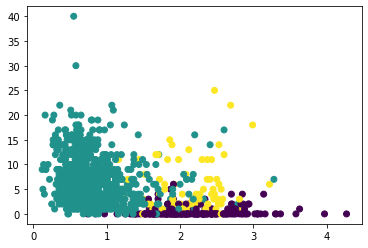

In [41]:
plt.scatter( x=processed_data.loc[:,"DATSCAN_PUTAMEN_L"], y=processed_data.loc[:,"NP2PTOT"] , c=processed_data.loc[:,"Name Encoding"])

## Question One, Part A

In [42]:
# removing all rows the have Scans Without Evidence of Dopaminergic Deficit (SWEDD)
cleaned_data = import_data[import_data.COHORT_DEFINITION != 'SWEDD']

In [47]:
# Using .groupby to find the mean and than later standard deviation
cleaned_data_mean = cleaned_data.groupby(['COHORT_DEFINITION']).mean()

# assigning mean values in table to variables
mean_hc = cleaned_data_mean.loc['Healthy Control','DATSCAN_PUTAMEN_L']
mean_pd = cleaned_data_mean.loc["Parkinson's Disease",'DATSCAN_PUTAMEN_L']

cleaned_data_mean


# ANOTHER METHOD TO FIND MEAN
# data_hc = data[data['COHORT_DEFINITION'] == 'Healthy Control']
# data_hc['DATSCAN_PUTAMEN_L'].mean()

,Unnamed: 0,ENROLL_AGE,DATSCAN_CAUDATE_R,DATSCAN_CAUDATE_L,DATSCAN_PUTAMEN_R,DATSCAN_PUTAMEN_L,NP2PTOT,Name Encoding
COHORT_DEFINITION,,,,,,,,
Healthy Control,415.272277,61.47000,2.953020,3.001832,2.156634,2.162475,0.430693,0.0
Parkinson's Disease,591.721311,62.24716,1.936948,1.943972,0.833064,0.813745,6.490542,1.0


In [49]:
cleaned_data_std = cleaned_data.groupby(['COHORT_DEFINITION']).std()

std_hc = cleaned_data_std.loc['Healthy Control','DATSCAN_PUTAMEN_L']
std_pd = cleaned_data_std.loc["Parkinson's Disease",'DATSCAN_PUTAMEN_L']

cleaned_data_std

,Unnamed: 0,ENROLL_AGE,DATSCAN_CAUDATE_R,DATSCAN_CAUDATE_L,DATSCAN_PUTAMEN_R,DATSCAN_PUTAMEN_L,NP2PTOT,Name Encoding
COHORT_DEFINITION,,,,,,,,
Healthy Control,296.461722,11.243164,0.606274,0.620679,0.562584,0.555774,0.996336,0.0
Parkinson's Disease,319.164786,9.731056,0.643671,0.628031,0.402638,0.381877,4.780825,0.0


In [53]:
#  This is a way you can use to take only the column you care about, for a given cohort type
cleaned_data[cleaned_data.COHORT_DEFINITION == 'Healthy Control']['DATSCAN_CAUDATE_L']
cleaned_data[cleaned_data.COHORT_DEFINITION == 'Healthy Control']

,Unnamed: 0,COHORT_DEFINITION,ENROLL_AGE,DATSCAN_CAUDATE_R,DATSCAN_CAUDATE_L,DATSCAN_PUTAMEN_R,DATSCAN_PUTAMEN_L,NP2PTOT,Name Encoding
0,0,Healthy Control,69.1,2.99,3.43,2.94,2.63,0.0,0
5,5,Healthy Control,81.9,3.99,3.46,2.07,2.12,2.0,0
6,6,Healthy Control,83.7,2.95,2.87,1.78,1.91,3.0,0
8,8,Healthy Control,31.9,3.69,3.89,3.27,2.74,0.0,0
10,10,Healthy Control,79.3,3.36,3.63,2.62,2.86,2.0,0
...,...,...,...,...,...,...,...,...,...
1057,1079,Healthy Control,69.3,2.59,2.56,1.82,2.07,0.0,0
1059,1081,Healthy Control,63.6,3.01,3.00,2.39,2.24,0.0,0
1065,1087,Healthy Control,63.4,3.05,3.54,2.12,2.11,0.0,0
1068,1090,Healthy Control,70.4,3.22,2.81,2.41,2.60,0.0,0


In [55]:
# my equidistance decision boundary is halfway between both means
boundary = 0.5*(mean_hc + mean_pd)
boundary

1.4881102593235362

## Question One, Part B

In [56]:
temp_data = pd.get_dummies(cleaned_data, columns=['COHORT_DEFINITION'])
# creating temp dataframe to run through linear regression
temp_data

,Unnamed: 0,ENROLL_AGE,DATSCAN_CAUDATE_R,DATSCAN_CAUDATE_L,DATSCAN_PUTAMEN_R,DATSCAN_PUTAMEN_L,NP2PTOT,Name Encoding,COHORT_DEFINITION_Healthy Control,COHORT_DEFINITION_Parkinson's Disease
0,0,69.1,2.99,3.43,2.94,2.63,0.0,0,1,0
1,1,65.1,1.56,1.12,0.62,0.48,3.0,1,0,1
2,2,67.6,2.13,2.28,0.80,0.83,15.0,1,0,1
3,3,56.7,2.19,1.27,0.66,0.57,5.0,1,0,1
4,4,57.5,2.28,2.12,0.76,0.15,4.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1068,1090,70.4,3.22,2.81,2.41,2.60,0.0,0,1,0
1069,1091,77.9,1.08,1.11,0.43,0.39,2.0,1,0,1
1070,1092,79.7,2.61,2.63,1.60,1.89,1.0,0,1,0
1071,1093,59.2,0.84,1.01,0.54,0.67,9.0,1,0,1


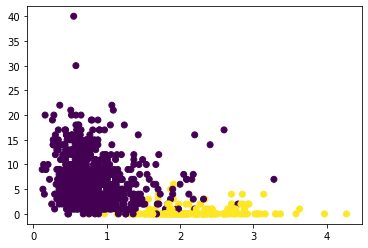

In [19]:
plt.scatter( x=temp_data.loc[:,"DATSCAN_PUTAMEN_L"], y=temp_data.loc[:,"NP2PTOT"], c=temp_data.loc[:,'COHORT_DEFINITION_Healthy Control'] )

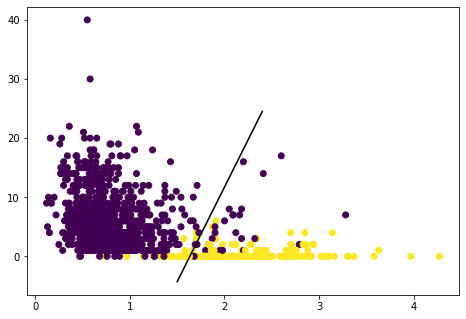

In [57]:
my_linear = LinearRegression()
my_linear.fit(temp_data.loc[:,"DATSCAN_PUTAMEN_L":"NP2PTOT"], temp_data.loc[:,'COHORT_DEFINITION_Healthy Control'])


beta = my_linear.coef_
beta_0 = my_linear.intercept_
decision_boundary = 0.5 

a = (decision_boundary - beta_0)/beta[1]
b = (-beta[0]/beta[1])

x1_seq = np.arange(1.5,2.5,0.1)
x2_seq = a+ b*x1_seq


#make a plot of the test data including the fitted line:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
plt.scatter( x=temp_data.loc[:,"DATSCAN_PUTAMEN_L"], y=temp_data.loc[:,"NP2PTOT"], c=temp_data.loc[:,'COHORT_DEFINITION_Healthy Control'] )
ax.plot(x1_seq, x2_seq,c='black')
plt.show()

## Question One, Part C

In [58]:
processed_data

,Unnamed: 0,COHORT_DEFINITION,ENROLL_AGE,DATSCAN_CAUDATE_R,DATSCAN_CAUDATE_L,DATSCAN_PUTAMEN_R,DATSCAN_PUTAMEN_L,NP2PTOT,Name Encoding
0,0,Healthy Control,69.1,2.99,3.43,2.94,2.63,0.0,0
1,1,Parkinson's Disease,65.1,1.56,1.12,0.62,0.48,3.0,1
2,2,Parkinson's Disease,67.6,2.13,2.28,0.80,0.83,15.0,1
3,3,Parkinson's Disease,56.7,2.19,1.27,0.66,0.57,5.0,1
4,4,Parkinson's Disease,57.5,2.28,2.12,0.76,0.15,4.0,1
...,...,...,...,...,...,...,...,...,...
1068,1090,Healthy Control,70.4,3.22,2.81,2.41,2.60,0.0,0
1069,1091,Parkinson's Disease,77.9,1.08,1.11,0.43,0.39,2.0,1
1070,1092,Healthy Control,79.7,2.61,2.63,1.60,1.89,1.0,0
1071,1093,Parkinson's Disease,59.2,0.84,1.01,0.54,0.67,9.0,1


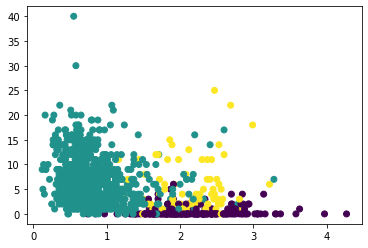

In [59]:
plt.scatter( x=processed_data.loc[:,"DATSCAN_PUTAMEN_L"], y=processed_data.loc[:,"NP2PTOT"] , c=processed_data.loc[:,"Name Encoding"])

In [23]:
processed_data.groupby(['COHORT_DEFINITION']).std()

,Unnamed: 0,ENROLL_AGE,DATSCAN_CAUDATE_R,DATSCAN_CAUDATE_L,DATSCAN_PUTAMEN_R,DATSCAN_PUTAMEN_L,NP2PTOT,Name Encoding
COHORT_DEFINITION,,,,,,,,
Healthy Control,296.461722,11.243164,0.606274,0.620679,0.562584,0.555774,0.996336,0.0
Parkinson's Disease,319.164786,9.731056,0.643671,0.628031,0.402638,0.381877,4.780825,0.0
SWEDD,187.816759,10.100300,0.588369,0.571343,0.513334,0.502592,5.116752,0.0


In [60]:
data_mean = processed_data.groupby(['COHORT_DEFINITION']).mean()

vec_mean_hc = data_mean.loc['Healthy Control','DATSCAN_PUTAMEN_L':'NP2PTOT']
vec_mean_pd = data_mean.loc['Parkinson\'s Disease','DATSCAN_PUTAMEN_L':'NP2PTOT']
vec_mean_swedd = data_mean.loc['SWEDD','DATSCAN_PUTAMEN_L':'NP2PTOT']

data_mean


,Unnamed: 0,ENROLL_AGE,DATSCAN_CAUDATE_R,DATSCAN_CAUDATE_L,DATSCAN_PUTAMEN_R,DATSCAN_PUTAMEN_L,NP2PTOT,Name Encoding
COHORT_DEFINITION,,,,,,,,
Healthy Control,415.272277,61.470000,2.953020,3.001832,2.156634,2.162475,0.430693,0.0
Parkinson's Disease,591.721311,62.247160,1.936948,1.943972,0.833064,0.813745,6.490542,1.0
SWEDD,378.538462,60.683607,2.834872,2.840385,2.058846,2.045385,5.641026,2.0


In [61]:
putamen_l = processed_data.loc[:,'DATSCAN_PUTAMEN_L']
np2ptot = processed_data.loc[:,'NP2PTOT']

cov_mat = np.stack((putamen_l, np2ptot), axis = 0)
sigma = np.cov(cov_mat)
mu_list = np.split(processed_data.groupby('COHORT_DEFINITION').mean().values[:,5:7],[1,2])

In [62]:
def calculate_boundary(X,MU_k,MU_l, SIGMA,pi_k,pi_l): 
    return (np.log(pi_k / pi_l) - 1/2 * (MU_k + MU_l).T @ np.linalg.inv(SIGMA)@(MU_k - MU_l) + X.T @ np.linalg.inv(SIGMA)@ (MU_k - MU_l)).flatten()[0]   


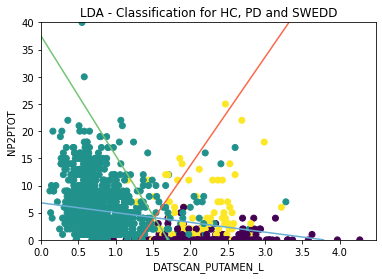

In [63]:
N = 100
X = np.linspace(0, 4, N)
Y = np.linspace(0,40, N)
X, Y = np.meshgrid(X, Y)


color_list = ['Reds', 'Blues', 'Greens']
my_norm = colors.Normalize(vmin = -1, vmax = 1)


plt.scatter(processed_data['DATSCAN_PUTAMEN_L'], processed_data['NP2PTOT'], c=processed_data.loc[:,"Name Encoding"])


for i,v in enumerate(itertools.combinations([0,1,2],2)):
    mu = mu_list[i]
    Sigma = sigma

#Computing the cost function for each theta combination    
    bb = np.array(  [ calculate_boundary(np.array([xx,yy]).reshape(-1,1),mu_list[v[0]].reshape(-1,1),mu_list[v[1]].reshape(-1,1), sigma , .33,.33)
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )
    
#Reshaping the cost values    
    B = bb.reshape(X.shape)

#Plot the result in 3D
    plt.contour( X, Y, B , levels = [0] ,cmap = color_list[i]  , norm = my_norm)


plt.ylabel('NP2PTOT')
plt.xlabel('DATSCAN_PUTAMEN_L')
plt.title('LDA - Classification for HC, PD and SWEDD')
plt.show()